# Sentiment Analysis
- dataset: Amazon fine food reviews

baselines:

1. VADER - bag of words method
2. Roberta pretrained Model from 🤗 (Hugging Face)
3. Huggingface Pipeline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot') # R style

In [3]:
import nltk

In [4]:
path = 'D:/Users/pc/Documents/VscodeFiles/dataset/NLP projects/Reviews.csv'
df = pd.read_csv(path)

In [5]:
df.head()
# id product_id user_id profile_name ...

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
# we are focus on text
df.Text.values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [7]:
df.shape

(568454, 10)

In [8]:
# OPTION!!!
# we select 500 rows for initial
df = df.head(500)

# EDA

In [9]:
df.Score.value_counts()

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64

In [10]:
df.Score.value_counts().sort_index() # star from 1 to 5 asc

Score
1     36
2     18
3     37
4     70
5    339
Name: count, dtype: int64

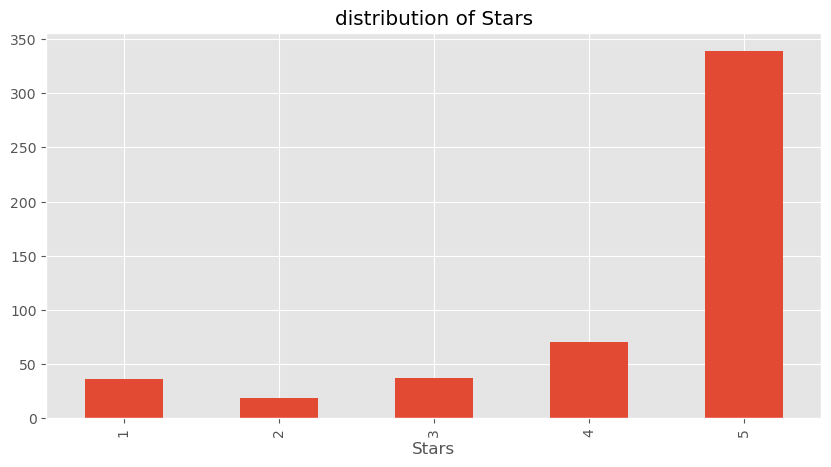

In [11]:
ax = df.Score.value_counts().sort_index().plot( # series.plot(params)
    kind='bar',
    title='distribution of Stars',
    figsize=(10, 5)
)
ax.set_xlabel('Stars')
plt.show()

# Basic NLTK

In [12]:
# take example text
example = df.Text[49]
example

'This is the same stuff you can buy at the big box stores.  There is nothing healthy about it.  It is just carbs and sugars.  Save your money and get something that at least has some taste.'

In [13]:
# change text into tokens using NLTK
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'is', 'the', 'same', 'stuff', 'you', 'can', 'buy', 'at', 'the']

In [14]:
# get pos of these tokens 
# pos is part of speech
tagged = nltk.pos_tag(tokens)
tagged[:5]

[('This', 'DT'), ('is', 'VBZ'), ('the', 'DT'), ('same', 'JJ'), ('stuff', 'NN')]

(S
  This/DT
  is/VBZ
  the/DT
  same/JJ
  stuff/NN
  you/PRP
  can/MD
  buy/VB
  at/IN
  the/DT
  big/JJ
  box/NN
  stores/NNS
  ./.
  There/EX
  is/VBZ
  nothing/NN
  healthy/JJ
  about/IN
  it/PRP
  ./.
  It/PRP
  is/VBZ
  just/RB
  carbs/JJ
  and/CC
  sugars/NNS
  ./.
  Save/VB
  your/PRP$
  money/NN
  and/CC
  get/VB
  something/NN
  that/WDT
  at/IN
  least/JJS
  has/VBZ
  some/DT
  taste/NN
  ./.)


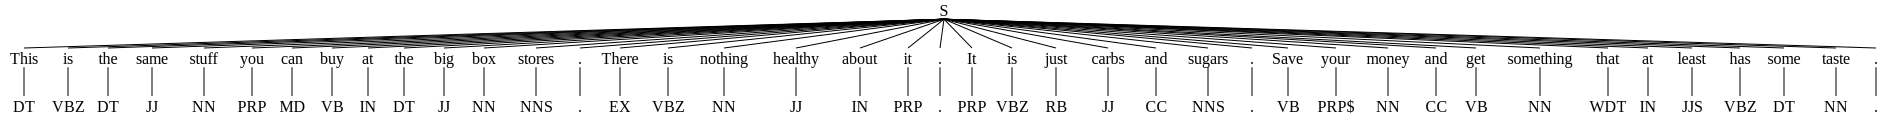

In [15]:
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')

# this is a tree structure

entities = nltk.chunk.ne_chunk(tagged) # NER???
entities.pprint()
entities

# Baselien1: VADER(Valance Aware Dictionary and Entiment Reasoner)

- bag of words method

1. stop words are removed
2. each word is scored and combined to a total score

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [17]:
# nltk.download('vader_lexicon')

In [18]:
sen_int_analyzer = SentimentIntensityAnalyzer()

In [19]:
# demo
sen_int_analyzer.polarity_scores('Fuck!')
# compound: aggregation of neg, pos, neu
# from -1 to 1

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5848}

In [20]:
sen_int_analyzer.polarity_scores('I don\'t like it')

{'neg': 0.513, 'neu': 0.487, 'pos': 0.0, 'compound': -0.2755}

In [21]:
# recall our example
print(example)
sen_int_analyzer.polarity_scores(example)

This is the same stuff you can buy at the big box stores.  There is nothing healthy about it.  It is just carbs and sugars.  Save your money and get something that at least has some taste.


{'neg': 0.056, 'neu': 0.865, 'pos': 0.079, 'compound': 0.2363}

entire dataset with si_analyzer

In [22]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [23]:
result = {} # empty dict

for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row.Text
    myid = row.Id
    result[myid] = sen_int_analyzer.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [24]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders.head()

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468


In [25]:
vaders = vaders.merge(df, how='left') # left join with original data

In [26]:
# left join and we get final dataset
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


plot the result

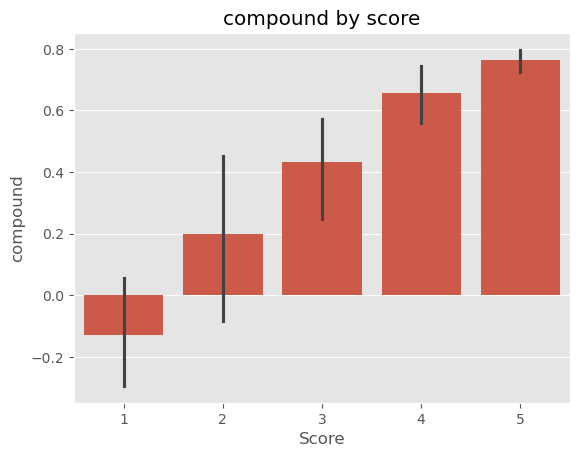

In [27]:
ax = sns.barplot(
    data = vaders,
    x='Score',
    y='compound'
)
ax.set_title('compound by score')
plt.show()

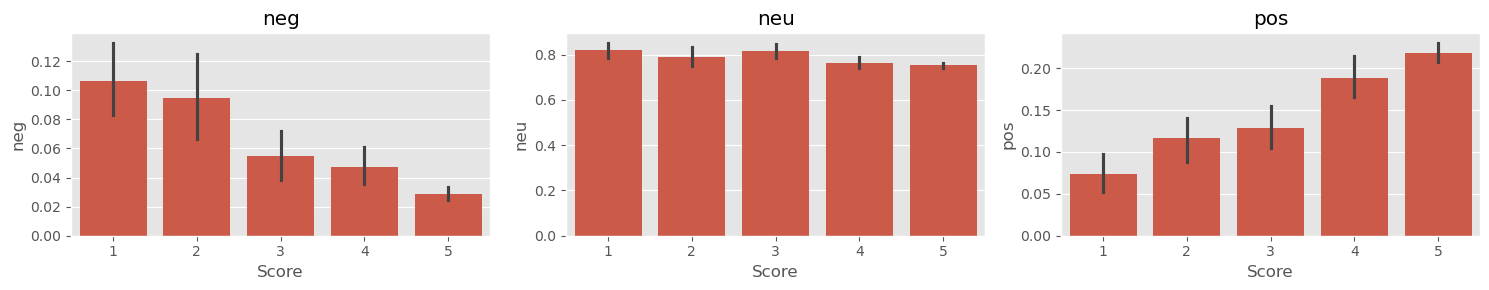

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
# ??? .subplot <=> .subplots
sns.barplot(
    data=vaders,
    x='Score',
    y='neg',
    ax=axes[0]
)
sns.barplot(
    data=vaders,
    x='Score',
    y='neu',
    ax=axes[1]
)
sns.barplot(
    data=vaders,
    x='Score',
    y='pos',
    ax=axes[2]
)
axes[0].set_title('neg')
axes[1].set_title('neu')
axes[2].set_title('pos')
plt.tight_layout() # for better visualization
plt.show()

# baseline2: hugging face
- pre-train model is using a large corpus of data
- transformer not only works on words but also focus on context related to words

In [29]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax # for classification

In [30]:
MODEL = f'cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [31]:
# recall example from vader
# we want to make comparison
print(example)
sen_int_analyzer.polarity_scores(example)

This is the same stuff you can buy at the big box stores.  There is nothing healthy about it.  It is just carbs and sugars.  Save your money and get something that at least has some taste.


{'neg': 0.056, 'neu': 0.865, 'pos': 0.079, 'compound': 0.2363}

In [32]:
# example for roberta model
encoded_text = tokenizer(example, return_tensors='pt')
encoded_text

{'input_ids': tensor([[    0,   713,    16,     5,   276,  2682,    47,    64,   907,    23,
             5,   380,  2233,  2326,     4,  1437,   345,    16,  1085,  2245,
            59,    24,     4,  1437,    85,    16,    95, 33237,     8, 34625,
             4,  1437, 11873,   110,   418,     8,   120,   402,    14,    23,
           513,    34,   103,  5840,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [33]:
output = model(**encoded_text)
type(output), output

(transformers.modeling_outputs.SequenceClassifierOutput,
 SequenceClassifierOutput(loss=None, logits=tensor([[ 2.1963, -0.1320, -2.3119]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None))

In [34]:
scores = output[0][0].detach().numpy()
scores

array([ 2.1962652 , -0.13200742, -2.311921  ], dtype=float32)

In [35]:
scores = softmax(scores)
scores

array([0.90213436, 0.08792558, 0.0099401 ], dtype=float32)

In [36]:
scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
scores_dict

{'roberta_neg': 0.90213436,
 'roberta_neu': 0.08792558,
 'roberta_pos': 0.0099401}

In [37]:
# create a function of above
def polarity_scores_roberta(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text) # decoder
    scores = output[0][0].detach().numpy() # get ndarray
    scores = softmax(scores) # make it a prob vector
    scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
    }
    return scores_dict 

In [38]:
result = {} # empty dict

for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row.Text
        myid = row.Id
        vader_result = sen_int_analyzer.polarity_scores(text)  
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f'vader_{key}'] = value 
        roberta_result = polarity_scores_roberta(text) # roberta prefer using GPU

        both = {**vader_result_rename, **roberta_result} # old version
        result[myid] = both
    except RuntimeError:
        print(f'break for id {myid}')


  0%|          | 0/500 [00:00<?, ?it/s]

break for id 83
break for id 187


In [39]:
result_df = pd.DataFrame(result).T
result_df = result_df.reset_index().rename(columns={'index': 'Id'})
result_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063


In [40]:
result_df = result_df.merge(df, how='left') # left join with original data

In [41]:
result_df.head() # final df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Visualization and Comparison

In [42]:
# before input list, we copy from .columns
result_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

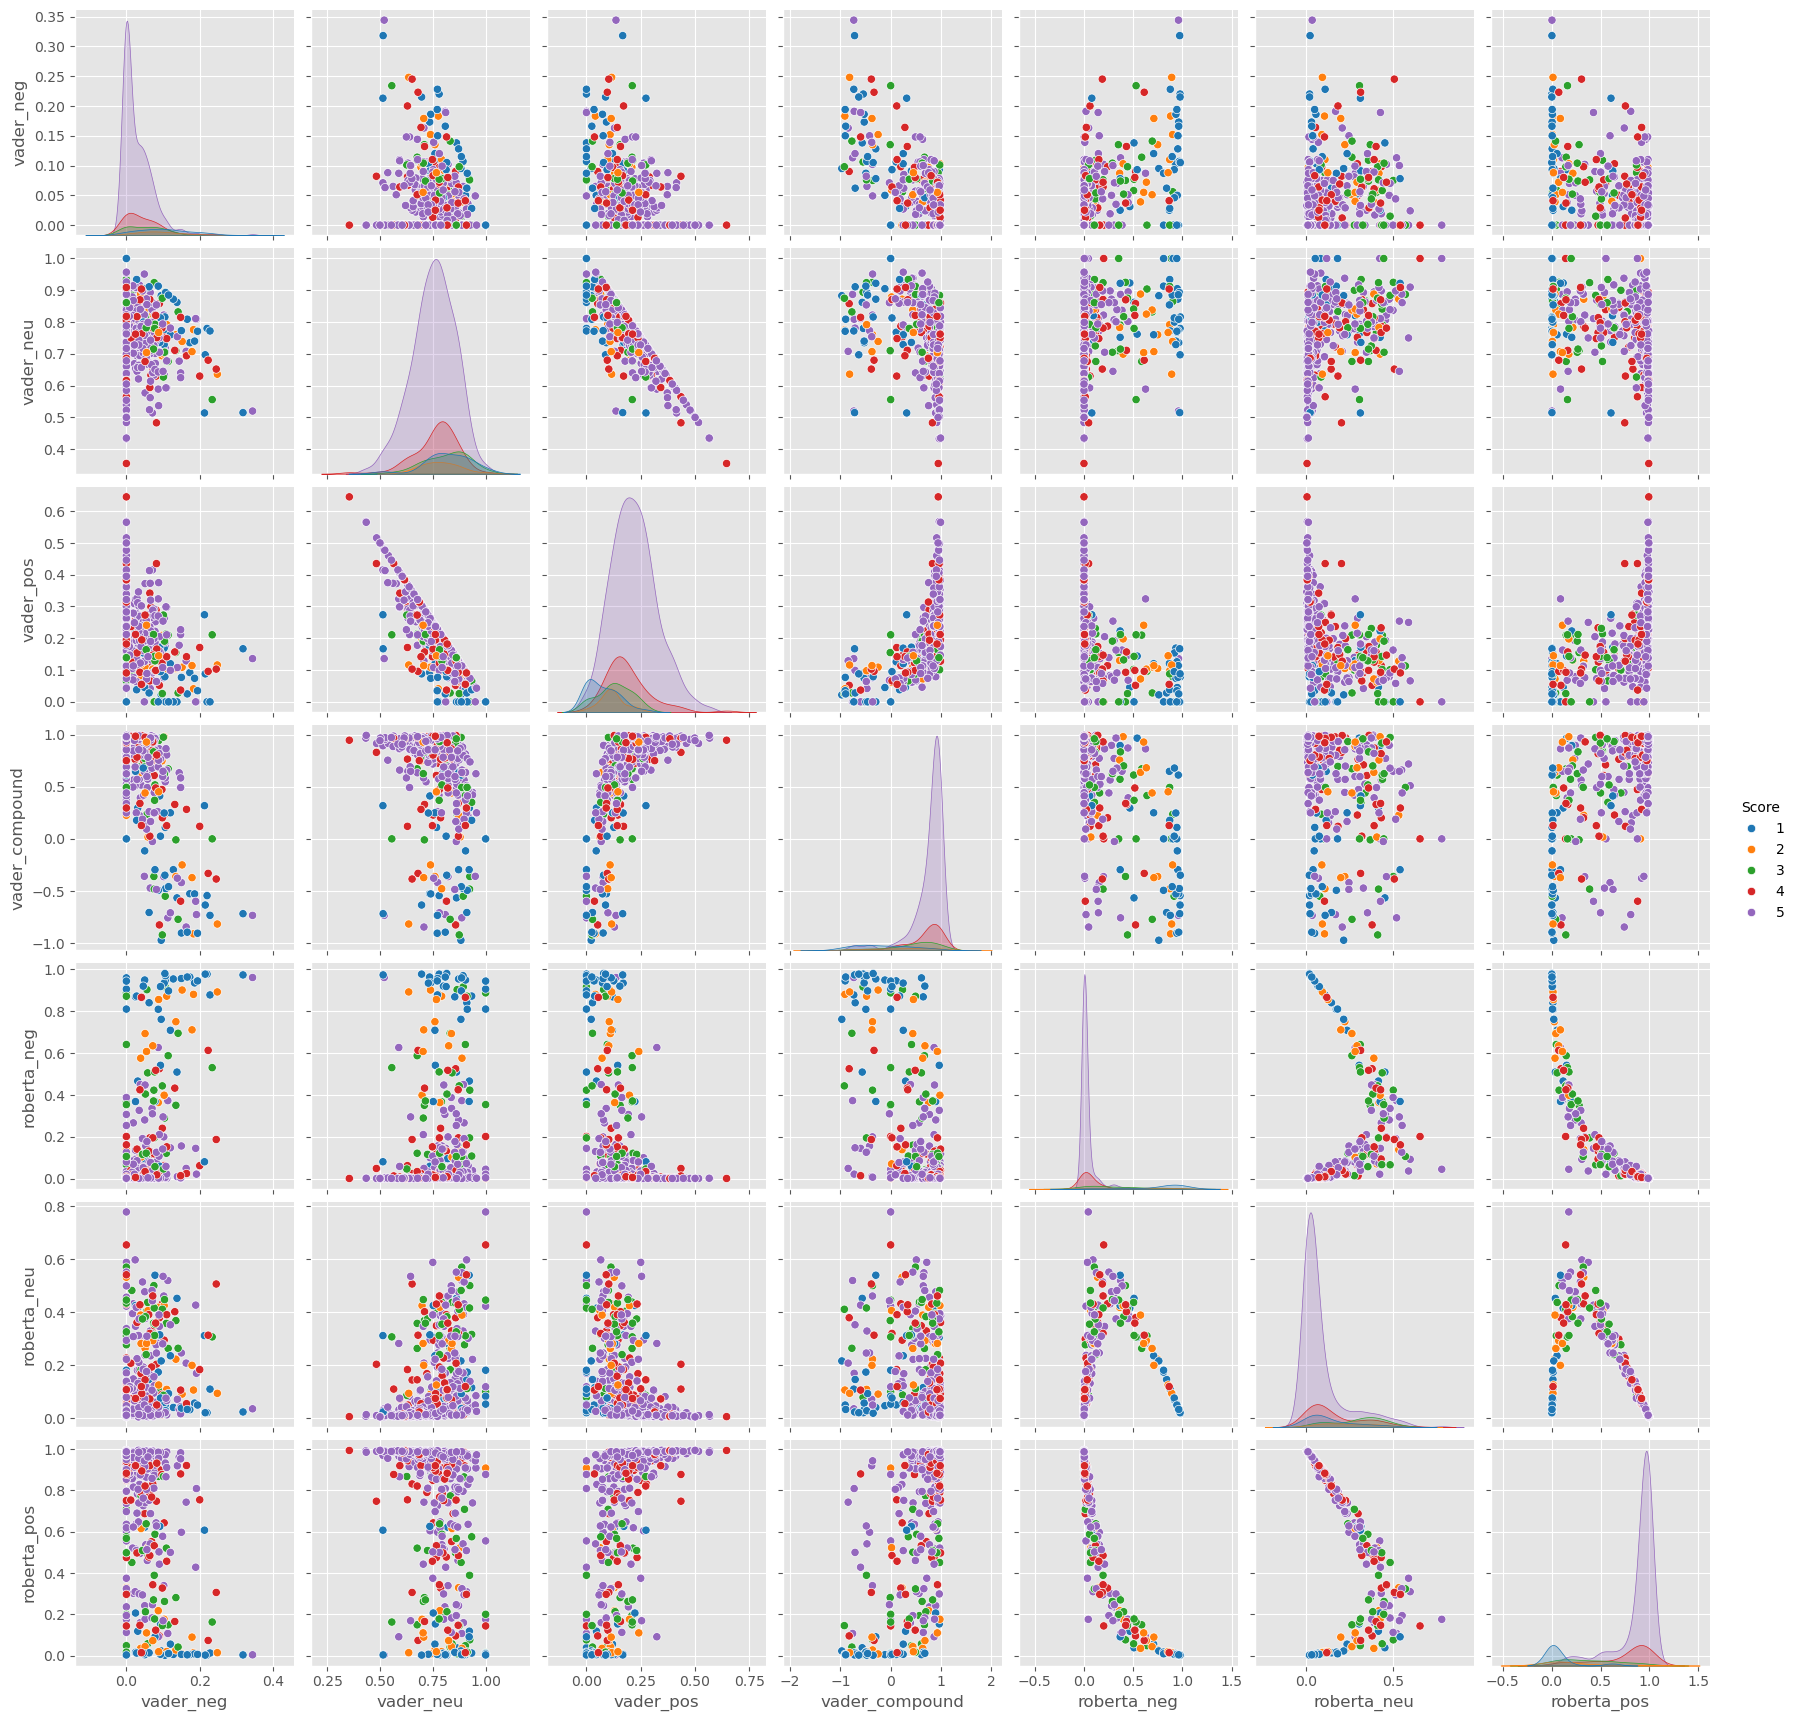

In [43]:
sns.pairplot(
    data=result_df,
    vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'], # paste
    hue='Score', # color
    palette='tab10'
)
plt.show()

from the fig:
1. roberta model is more confident

# Review Examples (especially outliers)

In [44]:
result_df.query('Score == 1').sort_values(by='roberta_pos', ascending=False).Text.values[0] # find the most roberta positive but with 1 star

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [45]:
result_df.query('Score == 1').sort_values(by='vader_pos', ascending=False).Text.values[0] # find the most vader positive but with 1 star

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [46]:
# on the opposite
result_df.query('Score == 5').sort_values(by='roberta_neg', ascending=False).Text.values[0] # find the most roberta negative but with 1 star

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [47]:
result_df.query('Score == 5').sort_values(by='vader_neg', ascending=False).Text.values[0] # find the most vader negative but with 1 star

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Extra: Transformer Pipeline

In [48]:
from transformers import pipeline

In [49]:
sentimen_pipeline = pipeline("sentiment-analysis") # download pre-train model

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [50]:
sentimen_pipeline('FUCK!')

[{'label': 'NEGATIVE', 'score': 0.9980177879333496}]

In [51]:
sentimen_pipeline('No way')

[{'label': 'NEGATIVE', 'score': 0.9970519542694092}]

In [52]:
sentimen_pipeline('I like sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9985498785972595}]